In [2]:
import glob
import os

import torch
import tqdm
from ml.training.utils import find_dominators_in_cfg
from networkx.algorithms.dominance import immediate_dominators
from networkx.classes import DiGraph
from paths import PROCESSED_DATASET_PATH, REPORT_PATH
from torch_geometric.data import Data
from torch_geometric.utils import remove_self_loops
from torch_geometric.utils.convert import from_networkx, to_networkx

DOMINATORS_DATASET_PATH = REPORT_PATH / "dataset_dominators"

In [2]:
import ast
import shutil
from pathlib import Path

from ml.training.dataset import Result

for map_name in tqdm.tqdm(os.listdir(PROCESSED_DATASET_PATH)):
    if not Path(os.path.join(DOMINATORS_DATASET_PATH, map_name)).exists():
        os.makedirs(os.path.join(DOMINATORS_DATASET_PATH, map_name))
        shutil.copyfile(
            os.path.join(PROCESSED_DATASET_PATH, map_name, "result"),
            os.path.join(DOMINATORS_DATASET_PATH, map_name, "result"),
        )
        with open(
            os.path.join(PROCESSED_DATASET_PATH, map_name, "result")
        ) as result_file:
            result = Result(*ast.literal_eval(result_file.read()))
    if result.coverage_percent == 100:
        for step_num, file_path in enumerate(
            glob.glob(os.path.join(PROCESSED_DATASET_PATH, map_name, "*.pt"))
        ):
            graph = torch.load(file_path, map_location="cpu")
            find_dominators_in_cfg(graph)
            torch.save(
                graph, os.path.join(DOMINATORS_DATASET_PATH, map_name, f"{step_num}.pt")
            )

100%|██████████| 561/561 [2:33:46<00:00, 16.45s/it]    


In [32]:
import ast
import shutil

from ml.training.dataset import Result

for map_name in tqdm.tqdm(os.listdir(PROCESSED_DATASET_PATH)):
    shutil.copyfile(
        os.path.join(PROCESSED_DATASET_PATH, map_name, "result"),
        os.path.join(DOMINATORS_DATASET_PATH, map_name, "result"),
    )
    # result_file = open(os.path.join(PROCESSED_DATASET_PATH))
    # result = Result(*ast.literal_eval(result_file.read()))
    # result_file.close()

100%|██████████| 558/558 [00:00<00:00, 4415.92it/s]


### Dataset sample

In [3]:
DATASET_FOR_KSENIA = REPORT_PATH / "dataset_small_sample"
DATASET_WITH_100 = REPORT_PATH / "dataset_with_100"


In [ ]:

for map_name in tqdm.tqdm(os.listdir(PROCESSED_DATASET_PATH)):
    with open(os.path.join(PROCESSED_DATASET_PATH, map_name, "result")) as result_file:
        result = Result(*ast.literal_eval(result_file.read()))
        if result.coverage_percent == 100:
            # os.makedirs(os.path.join(DATASET_WITH_100, map_name))
            shutil.copytree(
                os.path.join(PROCESSED_DATASET_PATH, map_name),
                os.path.join(DATASET_WITH_100, map_name),
            )


In [6]:
import random
from pathlib import Path
import shutil

files_paths = glob.glob(os.path.join(DATASET_WITH_100, '*', '*.pt'))

random.shuffle(files_paths)
for path in files_paths[:round(len(files_paths) * 0.3)]:
    _, _, map_name, file_name = os.path.normpath(path).split(os.sep)
    if not Path(os.path.join(DATASET_FOR_KSENIA, map_name)).exists():
        os.makedirs(os.path.join(DATASET_FOR_KSENIA, map_name))
        shutil.copyfile(os.path.join(DATASET_WITH_100, map_name, 'result'), os.path.join(DATASET_FOR_KSENIA, map_name, 'result'))
    shutil.copyfile(path, os.path.join(DATASET_FOR_KSENIA, map_name, file_name))

In [39]:
os.path.normpath(files_paths[0]).split(os.sep)

['report', 'dataset_with_100', 'SuffixTree.Insert_500_BFS', '65.pt']

In [17]:
hetero_graph = torch.load(
    "/home/ane4ka/PySymGym/AIAgent/report/dataset_before_filter_23.04.24/AmstradCPC.GetFirmware_1000_BFS/127.pt"
)


In [7]:
hetero_graph

HeteroData(
  y_true=[16, 1],
  use_for_train=False,
  game_vertex={ x=[229, 7] },
  state_vertex={ x=[16, 7] },
  (game_vertex, to, game_vertex)={
    edge_index=[2, 324],
    edge_attr=[324, 1],
    edge_type=[324],
  },
  (state_vertex, in, game_vertex)={ edge_index=[2, 16] },
  (game_vertex, in, state_vertex)={ edge_index=[2, 16] },
  (state_vertex, history, game_vertex)={
    edge_index=[2, 428],
    edge_attr=[428, 2],
  },
  (game_vertex, history, state_vertex)={
    edge_index=[2, 428],
    edge_attr=[428, 2],
  },
  (state_vertex, parent_of, state_vertex)={ edge_index=[2, 15] }
)

In [8]:
find_dominators_in_cfg(hetero_graph)

In [9]:
hetero_graph

HeteroData(
  y_true=[16, 1],
  use_for_train=False,
  game_vertex={ x=[229, 7] },
  state_vertex={ x=[16, 7] },
  (game_vertex, to, game_vertex)={
    edge_index=[2, 527],
    edge_attr=[324, 1],
    edge_type=[527],
  },
  (state_vertex, in, game_vertex)={ edge_index=[2, 16] },
  (game_vertex, in, state_vertex)={ edge_index=[2, 16] },
  (state_vertex, history, game_vertex)={
    edge_index=[2, 428],
    edge_attr=[428, 2],
  },
  (game_vertex, history, state_vertex)={
    edge_index=[2, 428],
    edge_attr=[428, 2],
  },
  (state_vertex, parent_of, state_vertex)={ edge_index=[2, 15] }
)

In [18]:

cfg = Data(
    hetero_graph["game_vertex"].x,
    hetero_graph[("game_vertex", "to", "game_vertex")].edge_index,
    hetero_graph[("game_vertex", "to", "game_vertex")].edge_type,
)


In [230]:
hetero_graph

HeteroData(
  y_true=[16, 1],
  use_for_train=False,
  game_vertex={ x=[229, 7] },
  state_vertex={ x=[16, 7] },
  (game_vertex, to, game_vertex)={
    edge_index=[2, 324],
    edge_attr=[324, 1],
    edge_type=[324],
  },
  (state_vertex, in, game_vertex)={ edge_index=[2, 16] },
  (game_vertex, in, state_vertex)={ edge_index=[2, 16] },
  (state_vertex, history, game_vertex)={
    edge_index=[2, 428],
    edge_attr=[428, 2],
  },
  (game_vertex, history, state_vertex)={
    edge_index=[2, 428],
    edge_attr=[428, 2],
  },
  (state_vertex, parent_of, state_vertex)={ edge_index=[2, 15] }
)

In [19]:
shift = 0
entry_points = []
for edge_idx, edge_type in enumerate(cfg.edge_attr):
    if edge_type in [1, 2]:
        cfg.edge_index = torch.cat(
            (
                cfg.edge_index[:, 0:edge_idx - shift],
                cfg.edge_index[:, edge_idx + 1 - shift:],
            ),
            dim=1,
        )
        shift += 1
for vertex_number in range(cfg.x.size()[0]):
    if vertex_number not in cfg.edge_index[1]:
        entry_points.append(vertex_number)

In [20]:
networkx_cfg: DiGraph = to_networkx(cfg)

In [21]:
dominators_graphs = list()
for start in entry_points:
    dominators_graphs.append(DiGraph(immediate_dominators(networkx_cfg, start).items()))

In [22]:
dominators_graphs[0].edges

OutEdgeView([(33, 33), (34, 33), (29, 33)])

In [213]:
networkx_cfg.edges

OutEdgeView([(0, 1), (1, 2), (2, 3), (3, 4), (4, 186), (5, 6), (6, 7), (7, 8), (8, 9), (9, 186), (10, 11), (11, 12), (12, 13), (13, 14), (14, 186), (15, 16), (16, 17), (17, 18), (18, 19), (19, 186), (20, 21), (21, 22), (22, 23), (23, 24), (24, 186), (30, 31), (30, 32), (31, 28), (32, 203), (33, 34), (33, 29), (34, 29), (35, 36), (36, 84), (37, 80), (38, 42), (42, 78), (43, 44), (44, 45), (45, 46), (45, 47), (46, 39), (47, 64), (48, 49), (48, 41), (49, 41), (50, 51), (51, 40), (51, 77), (52, 58), (53, 57), (54, 56), (56, 53), (56, 57), (58, 43), (58, 64), (64, 76), (65, 66), (66, 67), (67, 62), (68, 69), (68, 63), (69, 63), (70, 74), (71, 73), (72, 71), (72, 73), (74, 75), (74, 65), (76, 50), (76, 77), (78, 79), (78, 37), (79, 80), (81, 82), (82, 83), (85, 200), (91, 195), (92, 211), (93, 86), (94, 95), (94, 96), (95, 87), (96, 88), (97, 98), (97, 100), (98, 99), (99, 89), (99, 100), (100, 90), (101, 59), (101, 108), (104, 222), (105, 224), (106, 107), (106, 204), (107, 103), (108, 102)

In [215]:
from typing import Iterable

isinstance(dominators_graphs[0].edges, Iterable)

True

In [15]:
(hetero_graph[("game_vertex", "to", "game_vertex")].edge_attr == hetero_graph[("game_vertex", "to", "game_vertex")].edge_type)
# [("game_vertex", "to", "game_vertex")].edge_attr[hetero_graph[("game_vertex", "to", "game_vertex")].edge_attr != 0]

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

In [231]:
for dominators_graph in dominators_graphs:
    for edge in dominators_graph.edges:
        if edge[0] != edge[1]:
            hetero_graph[("game_vertex", "to", "game_vertex")].edge_index = torch.cat(
                (
                    hetero_graph[("game_vertex", "to", "game_vertex")].edge_index,
                    torch.tensor([[edge[0]], [edge[1]]]),
                ),
                dim=1,
            )
            hetero_graph[("game_vertex", "to", "game_vertex")].edge_type = torch.cat(
                (
                    hetero_graph[("game_vertex", "to", "game_vertex")].edge_type,
                    torch.tensor([3]),
                )
            )



In [233]:
hetero_graph[("game_vertex", "to", "game_vertex")].edge_type

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0,
        2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
        0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        2, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,

In [209]:
torch_graph = from_networkx(dominators_graphs[0])
torch_graph.edge_index = remove_self_loops(torch_graph.edge_index)

In [210]:
torch_graph.edge_index

(tensor([[1, 2],
         [0, 0]]),
 None)

In [183]:
entry_points

[33,
 35,
 38,
 48,
 52,
 54,
 68,
 70,
 72,
 81,
 116,
 155,
 157,
 159,
 164,
 167,
 172,
 192,
 194,
 199,
 206,
 210,
 216,
 220,
 221,
 227]

In [177]:
cfg.x.size()[0], torch.max(cfg.edge_index)

(229, tensor(228))

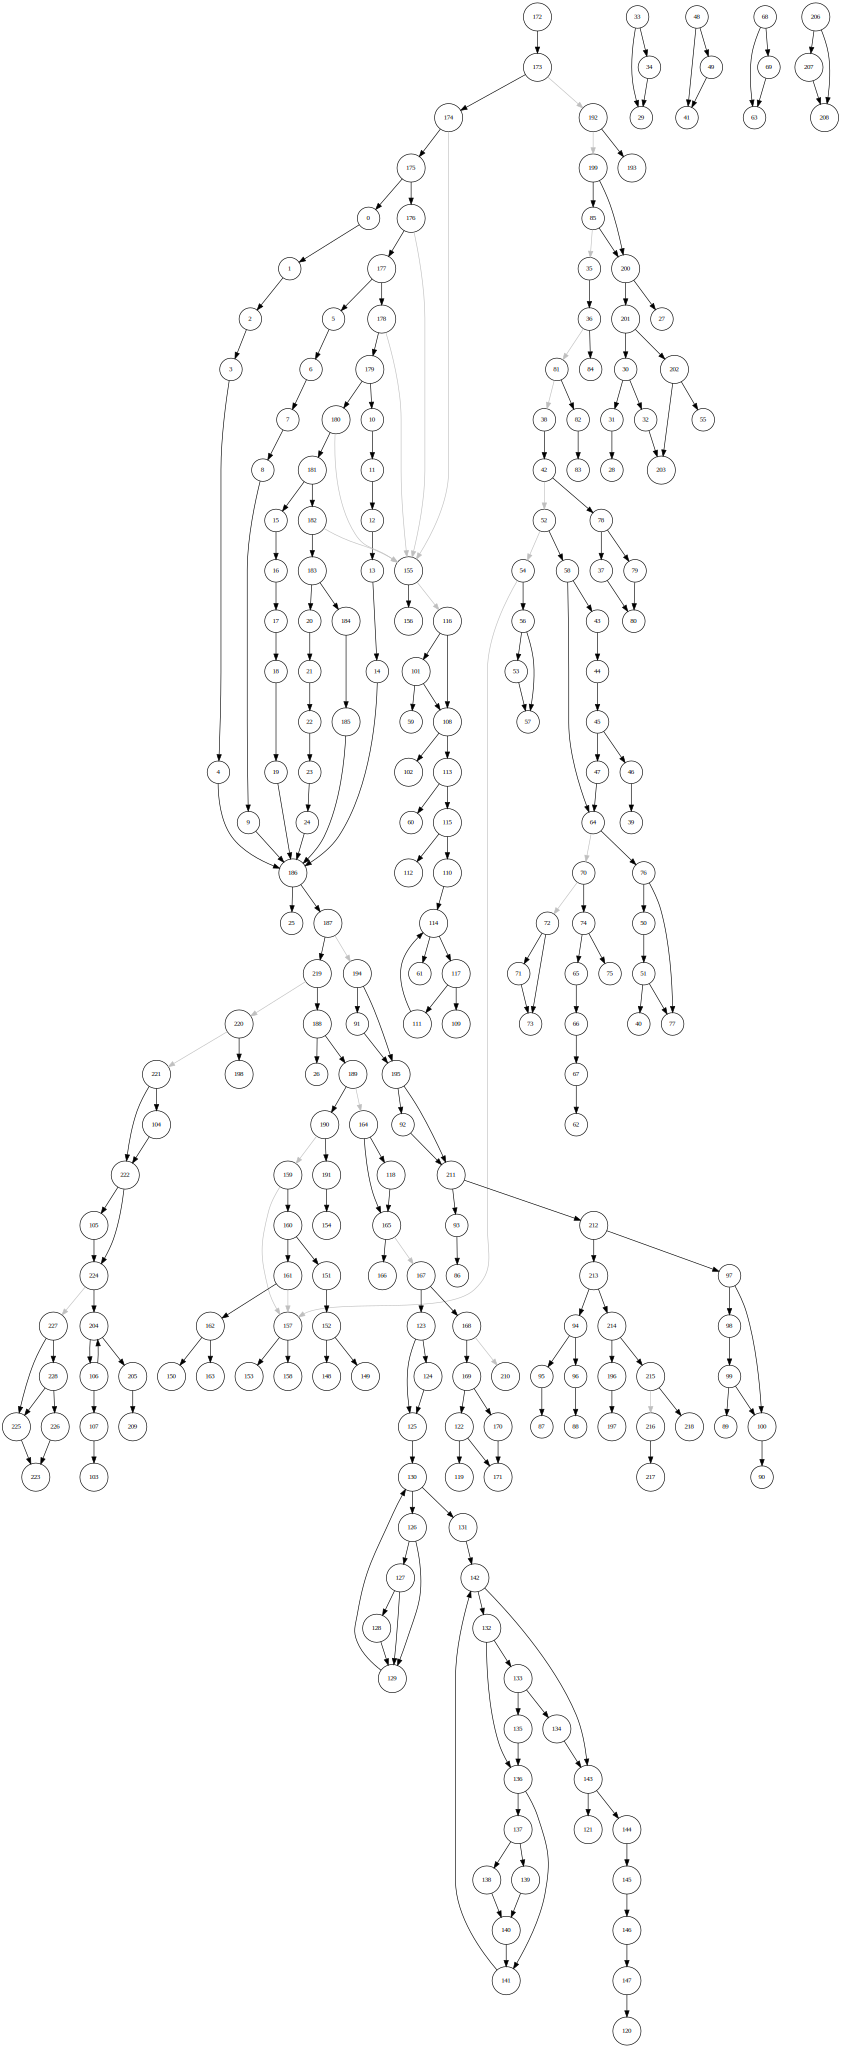

In [170]:
# from torch_geometric.explain import Explanation
from torch_geometric.visualization import visualize_graph

# Explanation(
#     x=cfg.x,
#     edge_index=cfg.edge_index,
#     edge_attr=cfg.edge_attr,
# ).visualize_graph(backend="graphviz")
cfg.edge_attr = 1 / (cfg.edge_attr + 1)
visualize_graph(
    edge_index=cfg.edge_index,
    edge_weight=cfg.edge_attr,
)

In [140]:
cfg.edge_attr

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 3, 1, 2, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3,
        3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1,
        3, 1, 2, 1, 3, 1, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1,
        1, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 2, 1, 1, 1, 2, 1, 1,
        3, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1,
        1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
        2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
        1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1,

In [124]:
len(entry_points)

27

In [120]:
cfg

Data(x=[229, 7], edge_index=[2, 240], edge_attr=[324])

In [25]:
cfg.x["x"][0]

tensor([1., 6., 0., 0., 1., 0., 0.])

In [46]:
from networkx.classes import DiGraph
from torch_geometric.utils.convert import to_networkx

networkx_graph: DiGraph = to_networkx(cfg)

In [61]:
iterator = networkx_graph.adjacency()
next(iterator)

(0, {1: {}})

In [5]:
import mlflow

mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")
downloaded_artifact_path = mlflow.artifacts.download_artifacts(
            "mlflow-artifacts:/778128978254789398/d3ed152be5e54c72bd5b625f75adf383/artifacts/4/model.pth", dst_path="../model_to_convert"
        )

### Dataset median

In [7]:
import statistics, tqdm, os, ast
from ml.training.dataset import Result

PROCESSED_DATASET_PATH = "./report/dataset"

steps_numbers = list()
for map_name in tqdm.tqdm(os.listdir(PROCESSED_DATASET_PATH)):
    map_path = os.path.join(PROCESSED_DATASET_PATH, map_name)
    with open(os.path.join(map_path, "result")) as result_file:
        result = Result(*ast.literal_eval(result_file.read()))
    if result.coverage_percent == 100:
        steps_numbers.append(len(os.listdir(map_path)) - 1)

print(f"Median: {statistics.median(steps_numbers)};", f"Average: {statistics.fmean(steps_numbers)}")

100%|██████████| 561/561 [00:00<00:00, 1393.30it/s]

Median: 277; Average: 1013.1104815864022
